<a href="https://colab.research.google.com/github/tomasm0703/linear-regression-testing/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/salarydata/'
path = folder_path + 'Salary_Data.csv'

Mounted at /content/drive


In [4]:
df = pd.read_csv(path)

In [5]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [8]:
%matplotlib inline


In [9]:
df.shape

(6704, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df[['Age', 'Salary']])


In [12]:
df_normalized

array([[-0.21287703, -0.47983873],
       [-0.73822062, -0.95348286],
       [ 1.49448964,  0.65690718],
       ...,
       [-0.47554883, -1.14294051],
       [ 1.62582554,  0.46744953],
       [-1.00089242, -1.52185581]])

In [28]:
df_normalized = pd.DataFrame(df_normalized, columns=['Age', 'Salary']).dropna()

In [29]:
df_normalized

,Age,Salary
0,-0.212877,-0.479839
1,-0.738221,-0.953483
2,1.494490,0.656907
3,0.312467,-1.048212
4,2.413841,1.604195
...,...,...
6699,2.019833,1.604195
6700,-0.212877,-1.237669
6701,-0.475549,-1.142941
6702,1.625826,0.467450


False


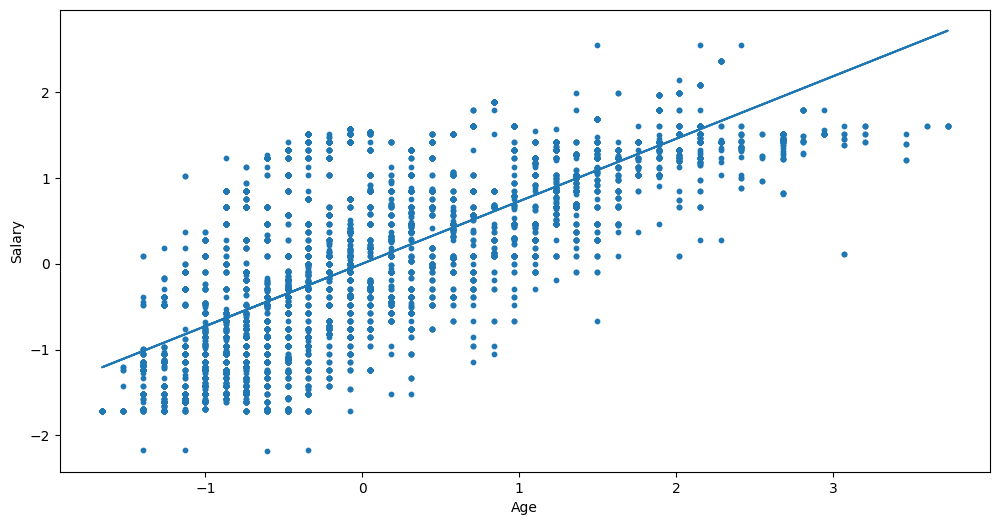

0.7279260526873145 -0.00011216156735926586


In [31]:
import random

print(np.any(np.isnan(df_normalized)))


def line_equation(x, m, b):
  return m*x + b

def find_best_cofficients(m, b, x, target, lr, epochs):
    for i in range(epochs):
        prediction = line_equation(x, m, b)
        error = target - prediction
        dm = -2 * np.dot(error, x) / len(x)
        db = -2 * np.sum(error) / len(x)
        m = m - lr * dm
        b = b - lr * db

    return m, b

m, b = linear_regression(df_normalized["Age"], df_normalized["Salary"], 0.001, 200)


def linear_regression(df_age, df_salary, lr, epochs):
  age_data = df_age.values
  salary_data = df_salary.values
  m = 0.0  # Initialize with 0
  b = 0.0  # Initialize with 0
  m, b = find_best_cofficients(m, b, age_data, salary_data, lr, epochs)
  return m, b

plt.figure(figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(df_normalized["Age"], df_normalized["Salary"], s=10 )
m, b = linear_regression(df_normalized["Age"], df_normalized["Salary"], 0.01, 500)  # Lower learning rate
y = line_equation(df_normalized["Age"].values, m, b)
plt.plot(df_normalized["Age"], y)
plt.show()
print(m,b)